In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.interpolate import interp1d


In [2]:
# import the dataset
# numbers are per thousand, so 1000 is multiplied
# Dataset is from the 2020 data
read_file = pd.read_csv('data/Inkomen_van_huishoudens__inkomensklassen_bruto_en_mediaan_2020.csv',sep=';', index_col=0, usecols=[0,3,4], decimal=',', comment='#') * 1000
read_file.index = [f'{num}' for num in range(1,11,1)]
read_file.index.name= 'decile'
read_file.columns = ['bruto','besteedbaar']
read_file['pct_deltas'] = (read_file.bruto - read_file.besteedbaar) / read_file.bruto

In [3]:
read_file.to_pickle('data_model_inputs/income_gross_to_disposable.pickletable')

In [4]:
# get interpolation with interp1d

interpol_gross_to_disposable = interp1d(x= read_file.bruto,
                    y=read_file.besteedbaar,
                    kind='cubic')

In [5]:
interval = 5000
inputs = np.arange(read_file.bruto.min(),
                    read_file.bruto.max(), interval)

In [6]:
test_outputs = interpol_gross_to_disposable(inputs)

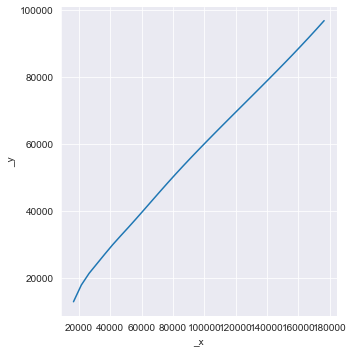

In [7]:
sns.relplot(x=inputs, y=test_outputs, kind='line')

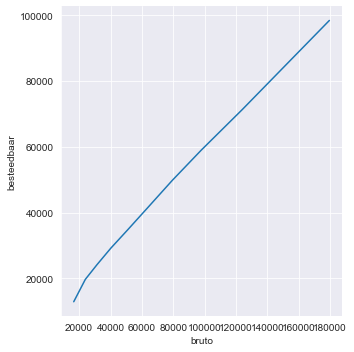

In [8]:
sns.relplot(data=read_file, x='bruto', y='besteedbaar',kind='line')

In [9]:
# melt
melt_read = pd.melt(read_file,value_vars=['besteedbaar','bruto'])
melt_read.index.name='decile'

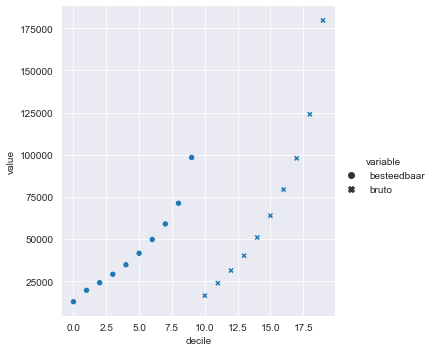

In [10]:
# get deltas?
# plot with each other
sns.relplot(data=melt_read, y='value', x='decile', style='variable')

